In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load file tanpa header karena file kamu tidak rapi
df = pd.read_csv('kemiskinan_jabar2024.csv', header=None)

# Atur nama kolom
df.columns = ['Wilayah', 'Persentase']

# Hapus dua baris awal (karena berisi judul atau tahun)
df = df.iloc[2:].copy()

# Ubah Persentase ke numeric
df['Persentase'] = pd.to_numeric(df['Persentase'], errors='coerce')

# Tampilkan data awal
print(df.head())

               Wilayah  Persentase
2                  NaN     2024.00
3  Provinsi Jawa Barat        7.46
4                Bogor        7.05
5             Sukabumi        6.87
6              Cianjur       10.14


In [3]:
def kategorikan(persen):
    if persen < 5:
        return 'Rendah'
    elif persen <= 10:
        return 'Sedang'
    else:
        return 'Tinggi'

df['Kategori'] = df['Persentase'].apply(kategorikan)
print(df[['Wilayah', 'Persentase', 'Kategori']])

                Wilayah  Persentase Kategori
2                   NaN     2024.00   Tinggi
3   Provinsi Jawa Barat        7.46   Sedang
4                 Bogor        7.05   Sedang
5              Sukabumi        6.87   Sedang
6               Cianjur       10.14   Tinggi
7               Bandung        6.19   Sedang
8                 Garut        9.68   Sedang
9           Tasikmalaya       10.23   Tinggi
10               Ciamis        7.39   Sedang
11             Kuningan       11.88   Tinggi
12              Cirebon       11.00   Tinggi
13           Majalengka       10.82   Tinggi
14             Sumedang        9.10   Sedang
15            Indramayu       11.93   Tinggi
16               Subang        9.49   Sedang
17           Purwakarta        8.41   Sedang
18             Karawang        7.86   Sedang
19               Bekasi        4.80   Rendah
20        Bandung Barat       10.49   Tinggi
21          Pangandaran        8.75   Sedang
22           Kota Bogor        6.53   Sedang
23        

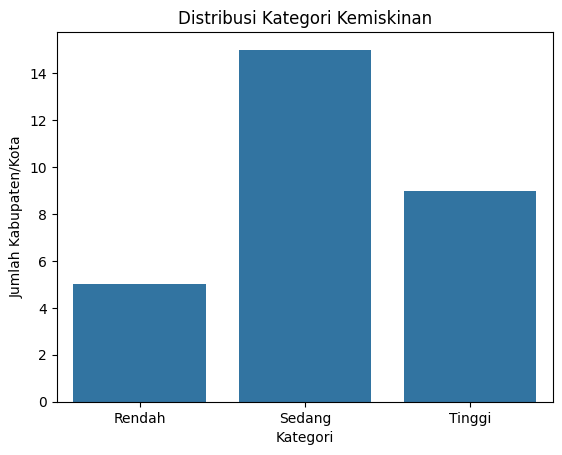

In [4]:
sns.countplot(data=df, x='Kategori', order=['Rendah', 'Sedang', 'Tinggi'])
plt.title("Distribusi Kategori Kemiskinan")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Kabupaten/Kota")
plt.show()

In [5]:
X = df[['Persentase']]
y = df['Kategori']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Akurasi: 0.6666666666666666

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       1.00      1.00      1.00         1
      Sedang       0.60      1.00      0.75         3
      Tinggi       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.53      0.67      0.58         6
weighted avg       0.47      0.67      0.54         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


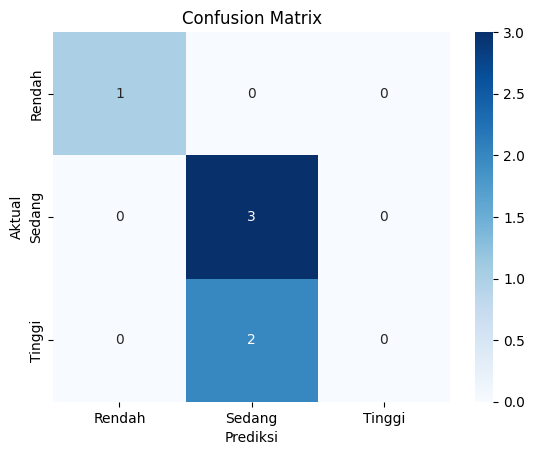

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [7]:
# Masukkan nilai persen, misal: 6.5
contoh = pd.DataFrame({'Persentase': [6.5]})
kategori_pred = model.predict(contoh)
print("Kategori prediksi:", le.inverse_transform(kategori_pred)[0])

Kategori prediksi: Sedang
